In [87]:
import os
import sys
import random
from glob import glob
from copy import deepcopy
from pprint import pprint

import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

from mejiro.utils import util
from mejiro.instruments.hwo import HWO

# set matplotlib style
plt.style.use('/grad/bwedig/mejiro/mejiro/mejiro.mplstyle')

# set HWO directory
hwo_dir = '/grad/bwedig/mejiro/projects/hwo'

In [88]:
logm_low = 6
logm_high = 11
num_bins = 100

In [89]:
def get_subhalo_params(detectable_subhalos):
    """
    Returns the redshift, mass, and concentration of detectable subhalos
    """    
    z_list, m_list, c_list = [], [], []
    for halo_list in detectable_subhalos:
        for z, m, c in halo_list:
            z_list.append(z)
            m_list.append(m)
            c_list.append(c)
    return z_list, m_list, c_list

In [90]:
def get_scatter_kwargs(data_dir, instrument, prefix):
    subhalos = util.unpickle_all(os.path.join(data_dir, instrument + '*'), prefix, '.pkl')
    z_list, m_list, c_list = get_subhalo_params(subhalos)
    return {
        'x': np.log10(m_list),
        'y': c_list,
        # 'label': f'EAC{eac} {band}',
    }

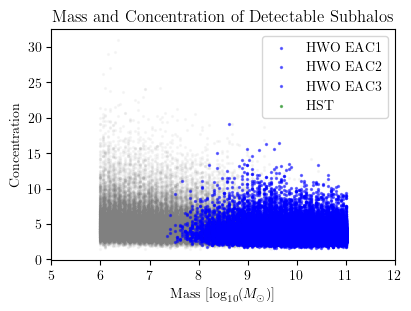

In [91]:
data_dir = '/data/bwedig/mejiro/subhalo_detection_compare'

f, ax = plt.subplots(figsize=(4, 3))

ax.scatter(**get_scatter_kwargs(data_dir, 'HWOEAC1', 'undetectable_halos_'), s=2, alpha=0.05, color='grey')
ax.scatter(**get_scatter_kwargs(data_dir, 'HWOEAC1', 'detectable_halos_'), s=2, alpha=0.5, color='blue', label='HWO EAC1')
ax.scatter(**get_scatter_kwargs(data_dir, 'HWOEAC2', 'undetectable_halos_'), s=2, alpha=0.05, color='grey')
ax.scatter(**get_scatter_kwargs(data_dir, 'HWOEAC2', 'detectable_halos_'), s=2, alpha=0.5, color='blue', label='HWO EAC2')
ax.scatter(**get_scatter_kwargs(data_dir, 'HWOEAC3', 'undetectable_halos_'), s=2, alpha=0.05, color='grey')
ax.scatter(**get_scatter_kwargs(data_dir, 'HWOEAC3', 'detectable_halos_'), s=2, alpha=0.5, color='blue', label='HWO EAC3')
ax.scatter(**get_scatter_kwargs(data_dir, 'HST', 'undetectable_halos_'), s=2, alpha=0.05, color='grey')
ax.scatter(**get_scatter_kwargs(data_dir, 'HST', 'detectable_halos_'), s=2, alpha=0.5, color='green', label='HST')
# ax.scatter(**get_scatter_kwargs(data_dir, 'JWST', 'undetectable_halos_'), s=2, alpha=0.05, color='grey')
# ax.scatter(**get_scatter_kwargs(data_dir, 'JWST', 'detectable_halos_'), s=2, alpha=0.5, color='orange', label='JWST')
# ax.scatter(**get_scatter_kwargs(data_dir, 'Roman', 'undetectable_halos_'), s=2, alpha=0.05, color='grey')
# ax.scatter(**get_scatter_kwargs(data_dir, 'Roman', 'detectable_halos_'), s=2, alpha=0.5, color='red', label='Roman')

plt.xlabel(r'Mass [$\log_{10}(M_{\odot})$]')
plt.ylabel('Concentration')
plt.xlim(logm_low - 1, logm_high + 1)
plt.legend()
plt.title('Mass and Concentration of Detectable Subhalos')
# plt.savefig(os.path.join(hwo_dir, 'figures', 'detectable_subhalos.png'))
plt.show()

In [92]:
def get_percent_detectable(m_list, detectable_halos):
    percent_det = []
    mlog10_list = [np.log10(m) for m in np.logspace(logm_low, logm_high, num_bins)]
    m_list = [np.log10(m) for m in m_list]

    for m in mlog10_list:
        count = np.sum(np.array(m_list) == m)
        percent_det.append(count / len(detectable_halos))

    return percent_det

In [93]:
def get_plot_kwargs(data_dir, instrument):
    mlog10_list = [np.log10(m) for m in np.logspace(logm_low, logm_high, num_bins)]  # 
    detectable_subhalos = util.unpickle_all(os.path.join(data_dir, instrument + '*'), 'detectable_halos_', '.pkl')
    z_list, m_list, c_list = get_subhalo_params(detectable_subhalos)
    return mlog10_list, get_percent_detectable(m_list, detectable_subhalos)

/tmp/ipykernel_3837704/1414927440.py:8: RuntimeWarning: invalid value encountered in scalar divide
  percent_det.append(count / len(detectable_halos))


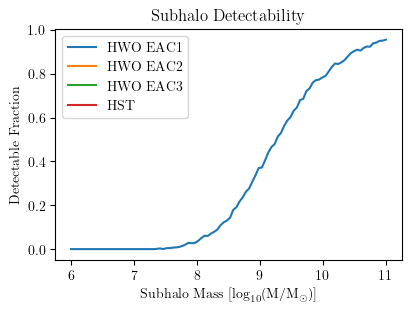

In [94]:
f, ax = plt.subplots(figsize=(4, 3))  # 
ax.plot(*get_plot_kwargs(data_dir, 'HWOEAC1'), label='HWO EAC1')
ax.plot(*get_plot_kwargs(data_dir, 'HWOEAC2'), label='HWO EAC2')
ax.plot(*get_plot_kwargs(data_dir, 'HWOEAC3'), label='HWO EAC3')
ax.plot(*get_plot_kwargs(data_dir, 'HST'), label='HST')
# ax.plot(*get_plot_kwargs(data_dir, 'JWST'), label='JWST')
# ax.plot(*get_plot_kwargs(data_dir, 'Roman'), label='Roman')
ax.legend()
ax.set_ylabel('Detectable Fraction')
ax.set_xlabel(r'Subhalo Mass [$\log_{10}($M/M$_\odot)$]')
plt.title('Subhalo Detectability')
# plt.savefig(os.path.join(hwo_dir, 'figures', 'subhalo_detection_compare.png'))
plt.show()

/tmp/ipykernel_3837704/1414927440.py:8: RuntimeWarning: invalid value encountered in scalar divide
  percent_det.append(count / len(detectable_halos))
/tmp/ipykernel_3837704/1890133205.py:26: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


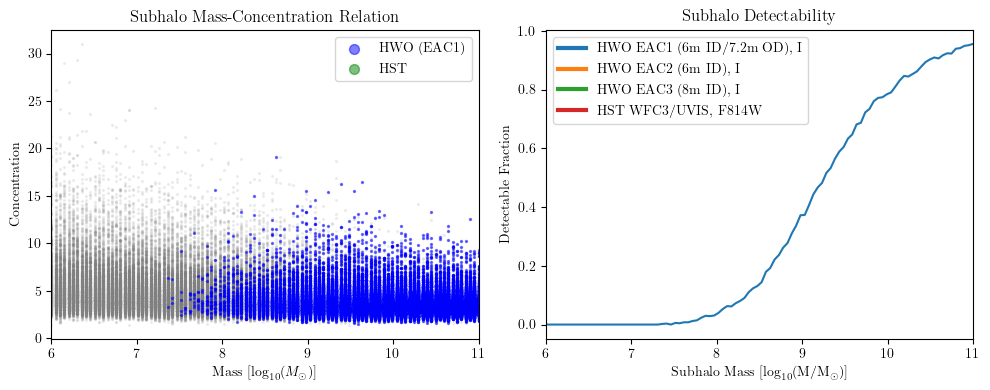

In [96]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Scatter plot: Mass vs Concentration of Detectable Subhalos
ax1.scatter(**get_scatter_kwargs(data_dir, 'HWOEAC1', 'undetectable_halos_'), s=2, alpha=0.1, color='grey')
ax1.scatter(**get_scatter_kwargs(data_dir, 'HWOEAC1', 'detectable_halos_'), s=2, alpha=0.5, color='blue', label='HWO (EAC1)')
ax1.scatter(**get_scatter_kwargs(data_dir, 'HST', 'detectable_halos_'), s=2, alpha=0.5, color='green', label='HST')
ax1.set_xlabel(r'Mass [$\log_{10}(M_{\odot})$]')
ax1.set_ylabel('Concentration')
ax1.set_xlim(logm_low, logm_high)
ax1.legend(markerscale=5)
ax1.set_title('Subhalo Mass-Concentration Relation')

# Line plot: Subhalo Detectability
ax2.plot(*get_plot_kwargs(data_dir, 'HWOEAC1'), label='HWO EAC1 (6m ID/7.2m OD), I')
ax2.plot(*get_plot_kwargs(data_dir, 'HWOEAC2'), label='HWO EAC2 (6m ID), I')
ax2.plot(*get_plot_kwargs(data_dir, 'HWOEAC3'), label='HWO EAC3 (8m ID), I')
ax2.plot(*get_plot_kwargs(data_dir, 'HST'), label='HST WFC3/UVIS, F814W')
legend = ax2.legend()
for line in legend.get_lines():
    line.set_linewidth(3)
ax2.set_ylabel('Detectable Fraction')
ax2.set_xlabel(r'Subhalo Mass [$\log_{10}($M/M$_\odot)$]')
ax2.set_title('Subhalo Detectability')
ax2.set_xlim(logm_low, logm_high)  # Adjusted x-axis limits for better visibility

plt.tight_layout()
plt.savefig(os.path.join(hwo_dir, 'figures', 'combined_subhalo_plots.png'), dpi=600)
plt.show()